In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib as mlt
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import skew

In [2]:
df=pd.read_csv(r"C:\Users\polasasuresh\pythonfiles\Salaries.csv")
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [3]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [4]:
df.dtypes

rank             object
discipline       object
yrs.since.phd     int64
yrs.service       int64
sex              object
salary            int64
dtype: object

In [5]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

<AxesSubplot:>

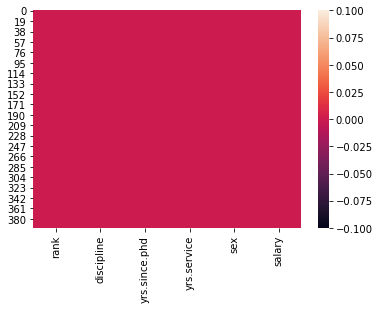

In [6]:
sns.heatmap(df.isnull())

# Data Visualiztion

<AxesSubplot:title={'center':'Rank Vs Salary'}, xlabel='rank', ylabel='salary'>

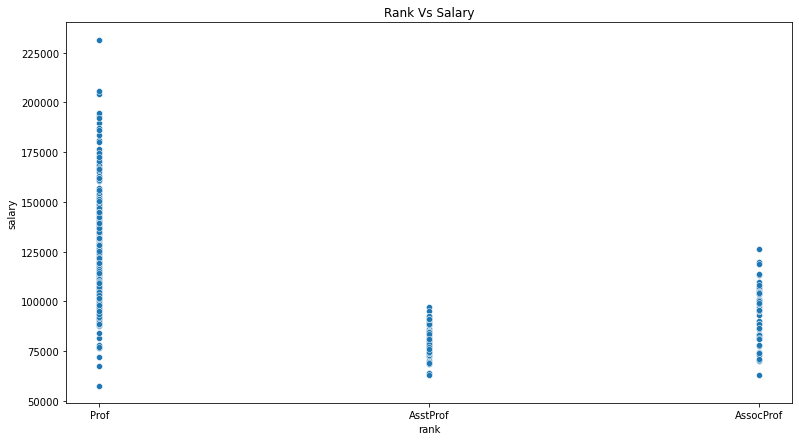

In [7]:
plt.figure(figsize=(13,7))
plt.title("Rank Vs Salary")
sns.scatterplot(x='rank',y="salary",data=df)

<AxesSubplot:title={'center':'DisciplineVs Salary'}, xlabel='discipline', ylabel='salary'>

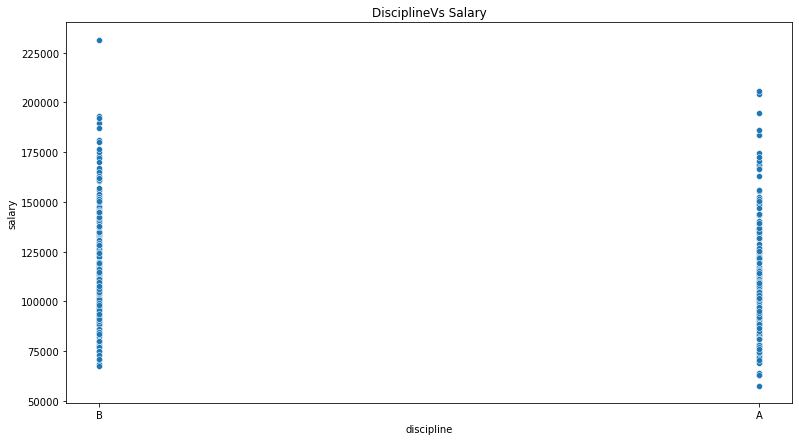

In [8]:
plt.figure(figsize=(13,7))
plt.title("DisciplineVs Salary")
sns.scatterplot(x='discipline',y="salary",data=df)

<AxesSubplot:title={'center':'Yrs.since.phd Vs Salary'}, xlabel='yrs.since.phd', ylabel='salary'>

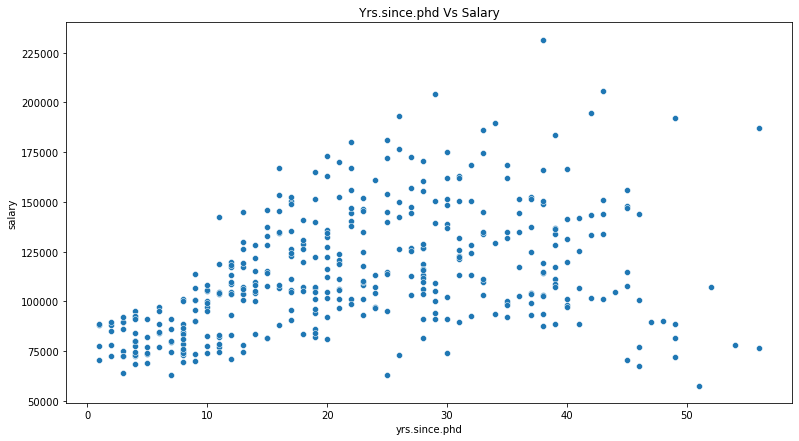

In [9]:
plt.figure(figsize=(13,7))
plt.title("Yrs.since.phd Vs Salary")
sns.scatterplot(x='yrs.since.phd',y="salary",data=df)

<AxesSubplot:title={'center':'Yrs.service Vs Salary'}, xlabel='yrs.service', ylabel='salary'>

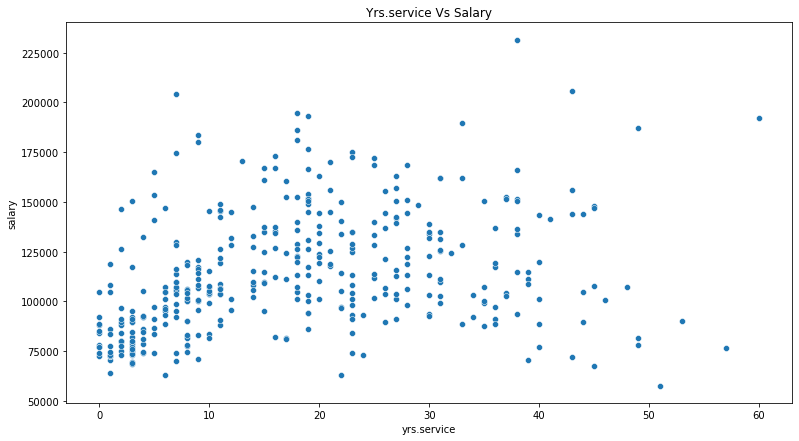

In [10]:
plt.figure(figsize=(13,7))
plt.title("Yrs.service Vs Salary")
sns.scatterplot(x='yrs.service',y="salary",data=df)

In [11]:
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


# Finding Correlation

In [12]:
df.corr()

,yrs.since.phd,yrs.service,salary
yrs.since.phd,1.000000,0.909649,0.419231
yrs.service,0.909649,1.000000,0.334745
salary,0.419231,0.334745,1.000000


In [13]:
df.corr()['salary'].sort_values()

yrs.service      0.334745
yrs.since.phd    0.419231
salary           1.000000
Name: salary, dtype: float64

yrs.since.phd is 42 percent correlated with salary
yrs.service is 33 percent correlated with salary

<AxesSubplot:>

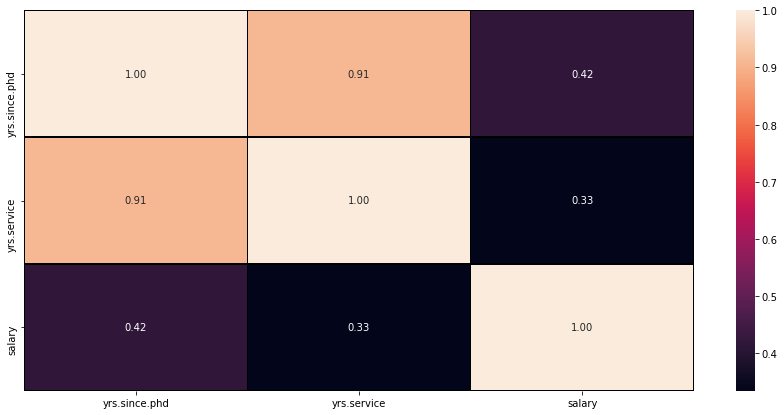

In [14]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,linecolor='black',fmt="0.2f")

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 14.0+ KB


# skewness

In [16]:
df.skew()

yrs.since.phd    0.300880
yrs.service      0.650569
salary           0.714568
dtype: float64

# Outliers Checking

<AxesSubplot:>

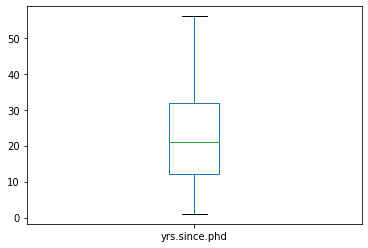

In [17]:
df['yrs.since.phd'].plot.box()

<AxesSubplot:>

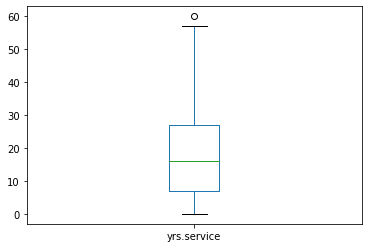

In [18]:
df['yrs.service'].plot.box()

<AxesSubplot:>

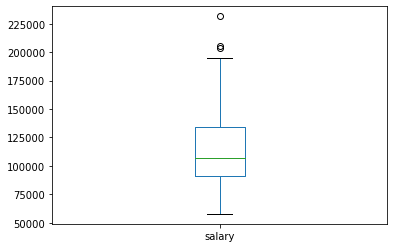

In [19]:
df['salary'].plot.box()

yrs.since.phd       AxesSubplot(0.125,0.657941;0.110714x0.222059)
yrs.service      AxesSubplot(0.257857,0.657941;0.110714x0.222059)
salary           AxesSubplot(0.390714,0.657941;0.110714x0.222059)
dtype: object

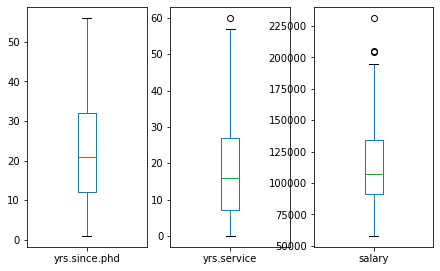

In [20]:
df.plot(kind='box',subplots=True,layout=(3,6),figsize=(15,15))

from the above outcome we can see that columns yrs.service has less outliers and yrs.since.phd has no outliers

<AxesSubplot:xlabel='yrs.service', ylabel='Density'>

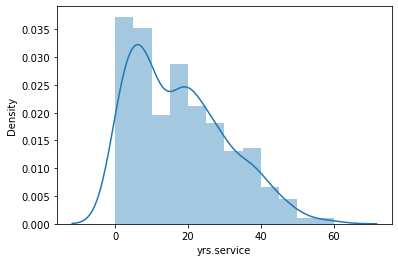

In [21]:
sns.distplot(df['yrs.service'])

<AxesSubplot:xlabel='yrs.since.phd', ylabel='Density'>

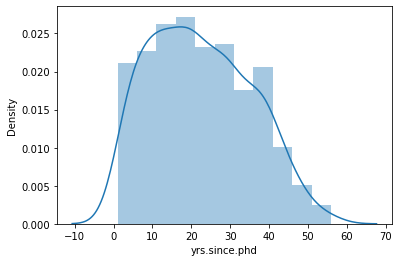

In [22]:
sns.distplot(df['yrs.since.phd'])


# Changing categeorical data into numerical data

In [23]:
oe=OrdinalEncoder()
list1=['rank','discipline','sex']
for val in list1:
    df[val]=oe.fit_transform(df[val].values.reshape(-1,1))
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2.0,1.0,19,18,1.0,139750
1,2.0,1.0,20,16,1.0,173200
2,1.0,1.0,4,3,1.0,79750
3,2.0,1.0,45,39,1.0,115000
4,2.0,1.0,40,41,1.0,141500
...,...,...,...,...,...,...
392,2.0,0.0,33,30,1.0,103106
393,2.0,0.0,31,19,1.0,150564
394,2.0,0.0,42,25,1.0,101738
395,2.0,0.0,25,15,1.0,95329


# removig outliers

In [24]:

from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.64925739, 0.91540317, 0.25754973, 0.02966908, 0.3300584 ,
        0.86091884],
       [0.64925739, 0.91540317, 0.17985426, 0.12429986, 0.3300584 ,
        1.96667226],
       [0.67256406, 0.91540317, 1.42298184, 1.12509795, 0.3300584 ,
        1.12249537],
       ...,
       [0.64925739, 1.09241483, 1.52944617, 0.56856036, 0.3300584 ,
        0.39564018],
       [0.64925739, 1.09241483, 0.20862311, 0.20128433, 0.3300584 ,
        0.60750187],
       [0.67256406, 1.09241483, 1.11219995, 1.04811348, 0.3300584 ,
        1.08001725]])

In [25]:
threshold=3
print(np.where(z>3))


(array([  9,  19,  24,  34,  35,  43,  47,  48,  52,  63,  68,  84,  90,
       103, 114, 119, 123, 127, 131, 132, 133, 148, 153, 179, 186, 218,
       230, 231, 233, 237, 245, 253, 254, 274, 316, 323, 330, 332, 334,
       341, 358, 361, 364], dtype=int32), array([4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 5],
      dtype=int32))


In [26]:
z[9][4]

3.0297668523315746

In [27]:
z[103][4]

3.0297668523315746

In [28]:
df_new=df[(z<3).all(axis=1)]
df_new

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2.0,1.0,19,18,1.0,139750
1,2.0,1.0,20,16,1.0,173200
2,1.0,1.0,4,3,1.0,79750
3,2.0,1.0,45,39,1.0,115000
4,2.0,1.0,40,41,1.0,141500
...,...,...,...,...,...,...
392,2.0,0.0,33,30,1.0,103106
393,2.0,0.0,31,19,1.0,150564
394,2.0,0.0,42,25,1.0,101738
395,2.0,0.0,25,15,1.0,95329


In [29]:
df.shape

(397, 6)

In [30]:
df_new.shape

(354, 6)

In [31]:
df_new.skew()

rank            -1.241757
discipline      -0.182308
yrs.since.phd    0.234156
yrs.service      0.529464
sex              0.000000
salary           0.584912
dtype: float64

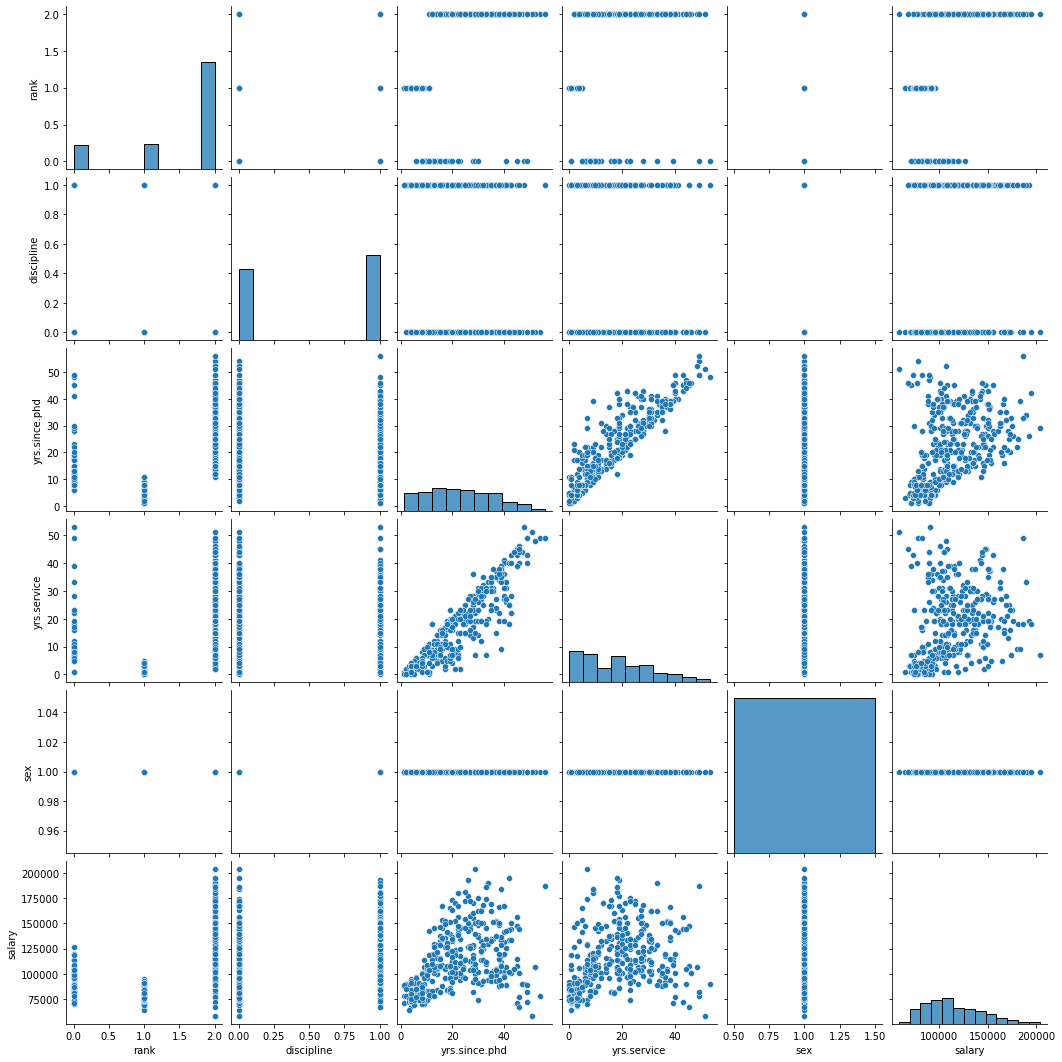

In [32]:
sns.pairplot(df_new)

 Finding Correlation

In [33]:
corr_map=df_new.corr()

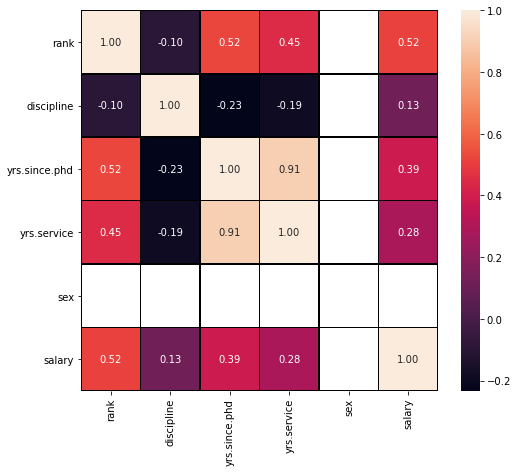

In [34]:
plt.figure(figsize=(8,7))
sns.heatmap(corr_map,annot=True,linewidth=0.5,linecolor='black',fmt='.2f')
plt.show()

yrs since phd is 39 percet correlated with salary
yrs.service is 28 percent correlated with salary


In [35]:
df_new.corr()['salary'].sort_values()

discipline       0.127542
yrs.service      0.284771
yrs.since.phd    0.386818
rank             0.515398
salary           1.000000
sex                   NaN
Name: salary, dtype: float64

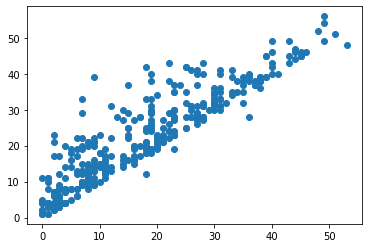

In [36]:
plt.scatter(df_new['yrs.service'],df_new['yrs.since.phd'])
plt.show()

In [37]:
df_new.describe()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
count,354.000000,354.000000,354.000000,354.000000,354.0,354.000000
mean,1.536723,0.545198,22.680791,17.920904,1.0,114396.135593
std,0.745188,0.498658,12.845445,12.836495,0.0,29220.456294
min,0.000000,0.000000,1.000000,0.000000,1.0,57800.000000
25%,1.000000,0.000000,12.000000,7.000000,1.0,92000.000000
50%,2.000000,1.000000,21.500000,17.500000,1.0,107768.000000
75%,2.000000,1.000000,32.000000,27.000000,1.0,134756.000000
max,2.000000,1.000000,56.000000,53.000000,1.0,204000.000000


# Data Cleaning

In [38]:
df_new.drop(['discipline','sex'],inplace=True,axis=1)
#df.drop('sex',axis=True,inplace=True)


In [39]:
x=df_new.iloc[:,:-1]
x.head()

,rank,yrs.since.phd,yrs.service
0,2.0,19,18
1,2.0,20,16
2,1.0,4,3
3,2.0,45,39
4,2.0,40,41


In [40]:
y=df_new.iloc[:,-1]
y.head()

0    139750
1    173200
2     79750
3    115000
4    141500
Name: salary, dtype: int64

In [41]:
x.shape

(354, 3)

In [42]:
y.shape

(354,)

# Transforming data to remove skewness

In [43]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[ 0.66261867, -0.16993349,  0.21391071],
       [ 0.66261867, -0.09133723,  0.06567291],
       [-1.18533666, -1.64343352, -1.32485378],
       ...,
       [ 0.66261867,  1.38580057,  0.67335521],
       [ 0.66261867,  0.28223854, -0.0121133 ],
       [-1.18533666, -1.16828402, -1.16384273]])

In [44]:
pd.DataFrame(x).skew()

0   -0.905242
1   -0.146134
2   -0.138197
dtype: float64

In [45]:
from sklearn.preprocessing import StandardScaler
#mean=0 and std=1
sc=StandardScaler()
x=sc.fit_transform(x)
x


array([[ 0.66261867, -0.16993349,  0.21391071],
       [ 0.66261867, -0.09133723,  0.06567291],
       [-1.18533666, -1.64343352, -1.32485378],
       ...,
       [ 0.66261867,  1.38580057,  0.67335521],
       [ 0.66261867,  0.28223854, -0.0121133 ],
       [-1.18533666, -1.16828402, -1.16384273]])

# Since target variable is a continuous varible so we use Linear Regression

# splitting the Dataframe

In [46]:
x=df_new.iloc[:,:-1]
y=df_new.iloc[:,-1]

In [47]:
x.head()

,rank,yrs.since.phd,yrs.service
0,2.0,19,18
1,2.0,20,16
2,1.0,4,3
3,2.0,45,39
4,2.0,40,41


In [48]:
y.shape

(354,)

In [49]:
x.shape

(354, 3)

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [51]:
from sklearn.preprocessing import StandardScaler
#mean=0 and std=1
sc=StandardScaler()
x=sc.fit_transform(x)
x


array([[ 0.62257137, -0.28695003,  0.00617053],
       [ 0.62257137, -0.20899123, -0.14985577],
       [-0.72127171, -1.45633194, -1.16402677],
       ...,
       [ 0.62257137,  1.50610224,  0.55226261],
       [ 0.62257137,  0.18080274, -0.22786893],
       [-0.72127171, -1.14449676, -1.08601362]])

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif["features"]=x_train.columns
vif

,vif,features
0,1.388617,rank
1,6.335935,yrs.since.phd
2,5.738815,yrs.service


There is a multicolliniarty exist in the dataset


In [53]:
correlation=df.corr()
correlation.loc['yrs.since.phd','salary']

0.41923110680257997

In [54]:
correlation.loc['yrs.service','salary']

0.3347446756998624

In [55]:
import scipy.stats as stats
r=stats.pearsonr(df['yrs.since.phd'],df['yrs.service'])
r

(0.9096491483396812, 8.496052063679043e-153)

from the above pearsons rank correlation 'yrs.since.phd' is 0.90 and 'yrs.service' is 8.49 so we can drop the yrs.service column

In [56]:
#df_new.drop(['yrs.service'],axis=1,inplace=True)
#df_new


In [57]:
df_new.drop('yrs.service',inplace=True,axis=1)

In [58]:
x=df_new.iloc[:,:-1]
x.head()

,rank,yrs.since.phd
0,2.0,19
1,2.0,20
2,1.0,4
3,2.0,45
4,2.0,40


In [59]:
y=df_new.iloc[:,-1]
y.shape

(354,)

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [61]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.transform(x_test)
x_train

array([[ 0.57719753,  0.10751915],
       [ 0.57719753,  1.19146536],
       [ 0.57719753,  0.41721806],
       [ 0.57719753, -0.43445396],
       [-0.84321031, -1.67324963],
       [ 0.57719753,  0.95919117],
       [-2.26361815,  0.33979334],
       [ 0.57719753,  1.11404063],
       [ 0.57719753,  0.18494388],
       [-2.26361815,  1.34631482],
       [ 0.57719753,  1.65601373],
       [ 0.57719753, -0.20217977],
       [ 0.57719753, -0.2796045 ],
       [-0.84321031, -1.20870125],
       [ 0.57719753,  2.50768576],
       [ 0.57719753, -0.12475504],
       [ 0.57719753, -0.43445396],
       [ 0.57719753,  2.3528363 ],
       [-2.26361815,  1.65601373],
       [ 0.57719753,  1.65601373],
       [ 0.57719753,  0.88176644],
       [ 0.57719753, -0.89900233],
       [ 0.57719753,  0.33979334],
       [-0.84321031, -1.20870125],
       [-0.84321031, -1.67324963],
       [ 0.57719753,  1.0366159 ],
       [ 0.57719753,  0.26236861],
       [-0.84321031, -1.44097544],
       [ 0.57719753,

In [62]:
lm=LinearRegression()
lm.fit(x_train,y_train)
lm.score(x_train,y_train)

0.2657830199994369

In [63]:
pred=lm.predict(x_test)
print("predicted result price",pred)
print("actual price",y_test)

predicted result price [121784.34645404 124135.88497826  81424.49240999 126193.48118695
 122372.2310851   99399.85206556 121490.40413851 126193.48118695
  98224.08280345 127075.30813353  98518.02511898  84363.91556526
 125017.71192484 120314.63487641  82894.20398762 124135.88497826
 121784.34645404  81130.55009446 123841.94266273 119726.75024535
 123841.94266273  97930.14048793 128251.07739563 127957.13508011
  81130.55009446  99105.90975004 120020.69256088 120020.69256088
 100575.62132767 120314.63487641 121490.40413851  82306.31935657
 123841.94266273  98811.96743451  85245.74251184 123254.05803168
 122078.28876957 119726.75024535  83188.14630315  84069.97324973
 124135.88497826  98518.02511898 119726.75024535 128251.07739563
 127075.30813353  98518.02511898  81424.49240999  80542.66546341
  82306.31935657  82306.31935657 122372.2310851  126781.365818
 126781.365818    81718.43472552  82600.2616721   99987.73669662
 129132.90434222  99399.85206556 123254.05803168 122960.11571615
 124

In [64]:
from sklearn.linear_model import Lasso,Ridge
ls=Ridge(alpha=0.0001)
ls.fit(x_train,y_train)
print(ls.score(x_train,y_train))

0.26578301999941123


In [65]:
predlasso=ls.predict(x_test)
print(mean_squared_error(y_test,predlasso))

462121024.5077548


In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

#Create a LinearRegression object
lr= LinearRegression()
#Fit X and y 
lr.fit(x_train, y_train)
ypred = lr.predict(x_test)
#Metrics to evaluate your model 
r2_score(y_test, ypred), mean_absolute_error(y_test, ypred), np.sqrt(mean_squared_error(y_test, ypred))


dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
yhat = dt.predict(x_test)
r2_score(y_test, yhat), mean_absolute_error(y_test, yhat), np.sqrt(mean_squared_error(y_test, yhat))


(0.3141792431038837, 16551.580380574047, 22088.002463883044)

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [68]:
from sklearn.linear_model import Lasso
params={'alpha':[0.0001,0.001,0.01,0.01,0.1,1.0]}
ls=Lasso()
clf=GridSearchCV(ls,params)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 1.0}


In [69]:
ls=Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
lss=r2_score(y_test,pred_ls)
lss

0.3503928689371717

In [70]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.2558544410069993

# Ensemble Technique

In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
params={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,params)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'log2'}


In [72]:
rf=RandomForestRegressor(criterion="mse",max_features='auto')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
rf.score

<bound method RegressorMixin.score of RandomForestRegressor()>

In [73]:
pred_desc=rf.predict(x_test)
pred_desc

array([129013.72281934, 122891.86241461,  91843.63133261, 122584.81416089,
       151546.54586219,  82371.68790476, 122654.63962457, 122584.81416089,
        77099.6333925 , 116948.94861103,  82819.88136317,  83601.79383333,
       128553.52014264, 133215.25812698, 110508.0495119 , 122891.86241461,
       129013.72281934,  88155.49216667, 127197.05894012, 110652.22190476,
       127197.05894012,  85372.97314286, 119191.57107143, 125314.00251984,
        88155.49216667,  80977.19097619, 113444.35784524, 113444.35784524,
        81184.35293579, 133215.25812698, 122654.63962457, 112039.46291667,
       127197.05894012,  75561.84418778,  90200.92      , 137502.57805952,
       121981.40369473, 110652.22190476,  92674.35708333,  98644.794     ,
       122891.86241461,  82819.88136317, 110652.22190476, 119191.57107143,
       116948.94861103,  82819.88136317,  91843.63133261,  92785.21866667,
       112039.46291667, 112039.46291667, 151546.54586219, 128832.31747835,
       128832.31747835,  

In [74]:
rfscore=cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print('cross val score',rfc*100)

cross val score 29.694364189780696


In [75]:
from sklearn.preprocessing import PolynomialFeatures
poly_train=PolynomialFeatures(degree=2,include_bias=False)
x_poly_train=poly_train.fit_transform(x_train)
x_poly_test=poly_train.transform(x_test)

In [76]:
lm=LinearRegression()
lm.fit(x_poly_train,y_train)

LinearRegression()

In [77]:
lm.score(x_poly_train,y_train)

0.39370888644897095

In [78]:
#predict the values
pred=lm.predict(x_poly_test)
print("Predicted salary",pred)
print("actual salary",y_test)

Predicted salary [128589.91773955 129614.38877227  95506.73232938 127074.83336334
 129238.71750488  82866.1495771  128167.34735509 127074.83336334
  78108.24070545 125004.74745591  79395.88842515  99690.527563
 128918.68988988 125822.59580536  98416.71746109 129614.38877227
 128589.91773955  94728.39429947 129715.39439735 124257.53802334
 129715.39439735  76755.14598456 121328.374896   122345.63853777
  94728.39429947  81774.84286098 125072.79041494 125072.79041494
  86576.90642968 125822.59580536 128167.34735509  97449.06441198
 129715.39439735  80618.08914366  99669.44960985 129721.06464394
 128947.04112281 124257.53802334  98802.37348386  99566.65954501
 129614.38877227  79395.88842515 124257.53802334 121328.374896
 125004.74745591  79395.88842515  95506.73232938  92975.37723606
  97449.06441198  97449.06441198 129238.71750488 125760.22309291
 125760.22309291  96219.62335811  97965.61443713  84852.42200577
 117883.90196355  82866.1495771  129721.06464394 129625.72926544
 129614.3887

In [79]:
diff=y_test-pred
diff

251   -26589.917740
50     -2993.388772
321      135.267671
206    35125.166637
66    -28238.717505
           ...     
385   -11492.595805
221    15735.053114
276     -356.153413
107   -13619.623358
210    11604.111575
Name: salary, Length: 71, dtype: float64

In [80]:
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean Squared error:',mean_squared_error(y_test,pred))
print('Root Mean Squared error:',np.sqrt(mean_squared_error(y_test,pred)))




error:
Mean absolute error: 15671.505305142628
Mean Squared error: 403380663.5121779
Root Mean Squared error: 20084.33876213449


In [81]:
df=pd.DataFrame({"Actual":y_test,"Predicted":pred})
df

,Actual,Predicted
251,102000,128589.917740
50,126621,129614.388772
321,95642,95506.732329
206,162200,127074.833363
66,101000,129238.717505
...,...,...
385,114330,125822.595805
221,145200,129464.946886
276,107200,107556.153413
107,82600,96219.623358


# Regularization

In [82]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [83]:
from sklearn.linear_model import Lasso
param={'alpha':[0.0001,0.001,0.01,0.1,1,1.0]}
ls=Lasso()
clf=GridSearchCV(ls,param)
clf.fit(x_train,y_train)
print(clf.best_params_)

ls=Lasso(alpha=1,random_state=0)

ls.fit(x_train,y_train)
print(ls.score(x_train,y_train))
predlasso=ls.predict(x_test)
predlasso

lss=r2_score(y_test,predlasso)
lss

{'alpha': 1}
0.2657830185971223


0.3503928689371718

here lm.score of 39% and with an r2_Score of 35% 